
## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Niek de Visscher | 10667474 | niekdevisscher@hetnet.nl |
| Leon Smits | 10500731 | leonmarijnsmits@gmail.com|
| Daniël van lier | 10639861 | danielvanlier@gmail.com |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='http://i.imgur.com/hConduu.jpg'/>
<img src='http://i.imgur.com/r4tIPrA.jpg?1'/>
<img src='http://i.imgur.com/KbRwRFz.jpg'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


# Python Recap Exam

This exam is meant to test how fluent or how rusty you are in Python. 
We do some simple things working with lists, counting things, and doing a bit of basic statistics.
You may not remember everything at one. That is no problem, if you can reasonably fast find it back using Python's reference.

Also, don't forget the great help that IPython can give you: TAB and ?

#### Start with running the following code.

In [ ]:
import re,pprint,nltk
from __future__ import division
from nltk.corpus import reuters 
# make a corpus of all words in the test files
testIDs= [w for w in reuters.fileids() if w.startswith('test')]
testWords=reuters.words(testIDs)
testWords[:5]


### Questions

Make the questions. 
Answer them  in the code block after the question. 

Reuse variables that you have defined in earlier questions in later questions.



(1) How many words/tokens are there in testWords? And how many unique tokens/words? What is the average frequency of a word?
Define a variable for each subquestion.
Then print out all variables at once. Use this style for the other exercises as well.
So something like:
```
NumWords = ...
NumUnique = ...
AvgFreq = ....
NumWords, NumUnique, AvgFreq
```
Or even better with a nicely formatted string.

(2) How many bigrams (a bigram is a sequence of two consequtive words)  are there in testWords? How many unique ones? What is the average bigram frequency? Explain the difference of the last two numbers with the numbers in the previous question. 
Make it easy for yourself. Just use the most "dumb" definition of bigram.

(3)  There are quite some tokens in testWords which are not really "words".

Use [regular expressions](https://docs.python.org/2/library/re.html) and use the list of english stopwords which can be obtained as follows:

```
from nltk.corpus import stopwords
# test
stopwords.words('english')[:20]
```

Don't display too many digits behind the comma: use the `round()` function to control that.

3.1. Create the list of all "punctuation tokens" in testWords.

3.2. Create the list of all "stopword tokens" in testWords. Use NLTK's english stopword list.

3.3. Compute the percentage of all tokens in testWords that is a punctuation and the percentage of all tokens in testWords that is a stopword.

3.4. How many (as a percentage) of the UNIQUE tokens in testWords is a punctuation? How many a stopword?



3.5 We will now start counting _how often_ words appear in the list `testWords`. Counting is a very important and often used tool. It is _expensive_ as it involves sorting.

There are several ways to do counting, and we look at a few of them:




In [11]:
# The number of times the word "the" occurs
the = [x for x in testWords if x=='the']
len(the), len(set(the)), the[:5]

(15048, 1, [u'the', u'the', u'the', u'the', u'the'])

In [12]:
# Each list has a count method, which is ideal for counting
testWords.count('the')

15048

In [13]:
# This trick counts all items in one go and yields a dictionary
from collections import Counter
z = ['blue', 'red', 'blue', 'yellow', 'blue', 'red']
Counter(z), Counter(z)['blue']
 

(Counter({'blue': 3, 'red': 2, 'yellow': 1}), 3)

In [14]:
# with NLTK we can make a similar datastructure
testfd= nltk.FreqDist(testWords)
testfd.items()[:5]

[(u'Durapipe', 1),
 (u'Irving', 17),
 (u'woods', 1),
 (u'hanging', 1),
 (u'HARDIE', 1)]

3.5.1 Use `set()` and dict comprehension to create a dict like `testfd` using the `.count()` method

3.5.2 You now have 3 ways to make a wordcount dictionary. Use the timing functions to see which one is the fastest.

3.5.3 Which percentage of the UNIQUE tokens in testWords is a hapax (i.e. occurs only once in testWords)?

3.5.4 Which percentage of the   tokens in testWords is a hapax? 

3.5.5 Explain why the following test returns True: `len(testfd)==len(set(testWords))`

(4) Count the tokens in testWords. Make an estimate of the following probability: given a string t, if we draw an arbitrary  token from testWords, what is the chance that it equals t?

Program it as a function prob(str).
Give an example of a high and of a low probability word.

Does prob work on every input string?

Test that 'the probabilities add up to 1'.

(5) Suppose we have printed out testWords  using exactly one space between each two tokens. Suppose we have covered a wall with this string. Now you throw a dart missile on this wall. Assume that it always hits exactly one character, which is either a space (inserted by our printing process) or a character in a token.

5.1 What is the probability that it hits a space?

5.2 Define a function prob(n) which for integer n returns the probability that the missile hits a token of length n.

5.3 Nicely print out a table of the form "n,  prob(n)" which for each n returns   prob(n). Format it well, and truncate numbers. Bonus points for those who make a plot.

5.3.1 Write a good test which indicates that prob(n) works correctly.

5.4 What is the probability that it hits a stopword?


In [12]:
import nltk
from collections import Counter
#Question 1:
NumWords = len(testWords)
NumUnique = len(Counter(testWords))
AvgFreq = NumWords/float(NumUnique)
print "Number of words in testWords:", NumWords
print "Number of unique words in testWords:", NumUnique
print "Average frequency of words in testWords:", AvgFreq


Number of words in testWords: 467205
Number of unique words in testWords: 22337
Average frequency of words in testWords: 20.9161928639


In [25]:
#Question 2:
bigrams = []
for x in range(len(testWords)-1):
    bigram = testWords[x],testWords[x+1]
    bigrams.append(bigram)
    
NumBigrams = len(bigrams)
NumUniqueBigrams = len(Counter(bigrams))
AvgBigrams = NumBigrams/float(NumUniqueBigrams)
print "Number of bigrams in testWords:", NumBigrams 
print "Number of unique bigrams in testWords:", NumUniqueBigrams
print "Average number of bigrams in testWords:", AvgBigrams

Number of bigrams in testWords: 467204
Number of unique bigrams in testWords: 155763
Average number of bigrams in testWords: 2.99945429916


In [26]:
#Question 3.1:
punctuations = ['(', ')', '?', ':', ';', ',', '.', '!', '/', '"', "'"]
punctList = []
for x in testWords:
    if x in punctuations:
        punctList.append(x)

print "The list of all punctuations in testWords:"
print punctList

The list of all punctuations in testWords:
[u'.', u'.', u'.', u"'", u',', u'.', u'.', u'.', u'.', u'.', u'.', u',', u"'", u'.', u'.', u'.', u',', u"'", u'.', u'.', u'"', u"'", u';', u'.', u'"', u'(', u')', u'.', u',', u';', u',', u'.', u'"', u'.', u'.', u'.', u'.', u',', u'.', u'.', u"'", u',', u"'", u'.', u'"', u',', u'.', u'.', u',', u'.', u'.', u',', u';', u"'", u'.', u'.', u',', u'.', u'.', u'.', u'.', u'.', u',', u'.', u'.', u',', u',', u'.', u'.', u'.', u'.', u'"', u',', u'.', u'"', u',', u'.', u'.', u'.', u'.', u"'", u',', u'.', u'.', u'.', u',', u'.', u'"', u'.', u"'", u',', u"'", u'.', u'.', u'.', u'.', u'.', u"'", u'.', u'.', u"'", u'.', u'.', u'.', u',', u"'", u'(', u'.', u"'", u',', u'.', u'.', u',', u',', u"'", u',', u'.', u',', u',', u'.', u'.', u',', u',', u'.', u'.', u'(', u')', u'/', u',', u'.', u'(', u')', u',', u'.', u'.', u'/', u',', u'.', u',', u',', u',', u'.', u"'", u',', u'/', u',', u'(', u')', u'(', u'.', u"'", u'.', u'.', u',', u'.', u'/', u'.', u'.', u'.', u"

In [ ]:
#Question 3.2:
from nltk.corpus import stopwords
stopList = []
for x in testWords:
    if x in stopwords.words('english'):
        stopList.append(x)

print "List of all stopwords in testWords:"
print stopList

In [33]:
#Question 3.3;
PercentagePunct = len(punctList)/float(len(testWords))
PercentageStop = len(stopList)/float(len(testWords))
print "Percentage of punctuations in testWords:",PercentagePunct,"%"
print "Percentage of stopwords in testWords:",PercentageStop,"%"

Percentage of punctuations in testWords: 0.125157050973 %
Percentage of stopwords in testWords: 0.226322492268 %


In [34]:
#Question 3.4:
PercentageUniquePunct = len(punctList)/float(NumUnique)
PercentageUniqueStop = len(stopList)/float(NumUnique)
print "Percentage of punctuations in number of words in testWords:",PercentageUniquePunct,"%"
print "Percentage of stopwords in number of words in testWords:",PercentageUniqueStop,"%"

Percentage of punctuations in number of words in testWords: 2.61780901643 %
Percentage of stopwords in number of words in testWords: 4.7338048977 %


In [4]:
#Question 3.5.1:
test = testWords[:500]
unique = []
for x in test:
    if x not in unique:
        unique.append(x)
counts = []
for i in unique:
    counts.append(test.count(i))
    
dictionary = dict(zip(unique, counts))
print dictionary

{u'Safe': 1, u'Threat': 1, u'office': 1, u'-': 3, u'able': 1, u'reserves': 1, u'major': 1, u'friction': 1, u'trade': 8, u'15': 1, u'remove': 1, u'Has': 1, u'53': 1, u'Sheen': 1, u'row': 1, u'impact': 1, u'whose': 1, u'We': 3, u'cut': 1, u'(': 1, u'had': 2, u',': 11, u'pct': 1, u'to': 14, u'lt': 3, u'7': 1, u'has': 1, u'might': 3, u'chairman': 1, u'pact': 1, u'them': 1, u'hit': 1, u'halt': 1, u'far': 1, u'James': 1, u'exporting': 1, u'possible': 1, u'Products': 1, u'T': 1, u'they': 1, u'import': 1, u'not': 2, u'world': 2, u'exporters': 2, u'firms': 1, u'association': 1, u'loss': 1, u'term': 1, u'Move': 1, u'DAMAGE': 1, u'taxes': 1, u'worried': 1, u'Unofficial': 1, u't': 1, u'Taiwanese': 1, u'Paul': 1, u'Matsushita': 1, u'few': 1, u'capitals': 1, u'cost': 1, u'do': 1, u'Mounting': 1, u'some': 1, u'retaliation': 1, u'economic': 1, u'are': 3, u'inflict': 1, u'year': 2, u'our': 1, u'FEAR': 1, u'dlrs': 5, u'subject': 1, u';': 3, u'said': 9, u'business': 1, u"'": 7, u'promotion': 1, u'exchang

In [7]:
import timeit
#Question 3.5.2:
test = testWords[:500]
def testfdmake():
    testfd= nltk.FreqDist(test)
    return testfd
def countermake():
    return Counter(test)
def dictmake():
    unique = []
    for x in test:
        if x not in unique:
            unique.append(x)
    counts = []
    for i in unique:
        counts.append(test.count(i))
    
    dictionary = dict(zip(unique, counts))
    return dictionary

print timeit.timeit(testfdmake)
print timeit.timeit(countermake)
print timeit.timeit(dictmake)

KeyboardInterrupt: 

In [28]:
#Question 3.5.3:
count = 0
unique = Counter(testWords)
for x,y in unique.iteritems():
    if y ==1:
        count += 1

print "Percentage of hapax unique tokens in testWords:", count/float(NumUnique)

Percentage of hapax unique tokens in testWords: 0.401128172987


In [29]:
#Question 3.5.4:
count = 0
unique = Counter(testWords)
for x,y in unique.iteritems():
    if y ==1:
        count += 1

print "Percentage of hapax tokens in testWords:", count/float(len(testWords))

Percentage of hapax tokens in testWords: 0.0191778769491


#### Question 3.5.5:
This is how 'testfd' is made:<p>
testfd= nltk.FreqDist(testWords)<p>
testfd is now a set of of testWords where the pairs are the words and how many times they apear in testWords. So it gives the frequency of all the words in testWords, which is the same as 'set(testWords)' would do.

In [53]:
import random
#Question 4:
def prob(str):
    tokenscount = len(Counter(testWords))
    tokens = Counter(testWords)
    rng = random.randint(0,tokenscount)
    strcount = tokens[str]
    chance = strcount/float(tokenscount)
    return chance

print "The chance that the word that is picked is 'the':", prob('the'),"%"
print "The chance that the word that is picked is 'segment':", prob('segment'),"%"

countcheck = 0
for x in Counter(testWords):
    countcheck += prob(x)
    
print "Here the check to see that the percentage adds up to 1:", countcheck

The chance that the word that is picked is 'the': 0.673680440525 %
The chance that the word that is picked is 'segment': 0.000223843846533 %


In [10]:
#Question 5.1:
numspaces = len(testWords)-1
numchars = 0
for y in testWords:
    numchars += len(y)

totalchars = numSpaces+numchars
probability = numspaces/totalchars
print "The chance it will hit a space is:",probability"%"

0.2032893254


In [21]:
#Question 5.2:
def prob(n):
    count = 0
    for x in Counter(testWords):
        if n == len(x):
            count += 1
    goodchars = count*n
    probability = goodchars/float(totalchars)
    return probability

print "The chance you will hit a token of lenght 3:", prob(3),"%"

The chance you will hit a token of lenght 3: 0.0033260494417 %


Here the table for the probability of up to n=10
n	prob(n)
0	0.0
1	2.91529712969e-05
2	0.000400309456615
3	0.0033260494417
4	0.00464184922083
5	0.00549120145921
[0.0, 2.9152971296941722e-05, 0.00040030945661472217, 0.003326049441698844, 0.004641849220832452, 0.0054912014592149935]


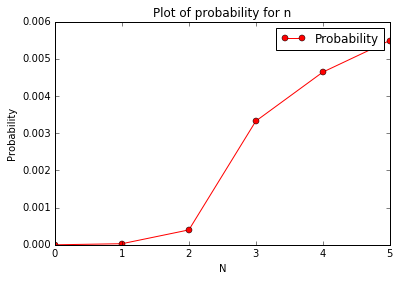

In [47]:
#Question 5.3:
listprobs = []
ploty = []
plotprob = []
print "Here the table for the probability of up to n=10"
print "\t".join(["n","prob(n)"])
for x in range(6):
    ploty.append(x)
    plotprob.append(prob(x))
    listprobs.append([str(x),str(prob(x))])
for y in listprobs:
    print "\t".join(y)
print plotprob
#this line prepares IPython for working with matplotlib
%matplotlib inline  

# this actually imports matplotlib
import matplotlib.pyplot as plt 

plt.figure()
plt.title("Plot of probability for n")
plt.plot(ploty, plotprob,  'ro-', label='Probability')
plt.legend(loc = 'upper right')
plt.xlabel("N")
plt.ylabel("Probability")

In [ ]:
#Question 5.3.1:


In [ ]:
#Question 5.4:
stopcount = 0
for x in stoplist:
    stopcount += len(x)

probability = stopcount/totalchars
print "The chance it will hit a stopword is:",probability"%"

BONUS (if you have time left or got bored)

Show that the  words in testWords have a Zipfian distribution. Count the words, order them by their frequency. Plot the log(frequency) times log(index of the word). 

Use `% matplotlib inline` to display the figure in the notebook.

Is it a straight line?

Now do the same for the unigrams and the bigrams together in one list. Is the plot "better"? What does 'better' mean here?
